## Read [Dataset](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy/data)

In [1]:
import pandas as pd
global_data_df = pd.read_csv("/content/global-data-on-sustainable-energy.csv",
                             index_col = ["Year"])
global_data_df.head()

,Entity,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
Year,,,,,,,,,,,,,,,,,,,,
2000,Afghanistan,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2001,Afghanistan,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2002,Afghanistan,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
2003,Afghanistan,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
2004,Afghanistan,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [2]:
global_data_df.columns

Index(['Entity', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')

### Clean the data

In [3]:
# get rows that contain "Indonesia"
global_data_df = global_data_df[global_data_df["Entity"] == "Indonesia"]
# drop other columns and columns with NaN
columns_to_drop = ["Access to electricity (% of population)", "gdp_per_capita","Entity", "Land Area(Km2)", "Density", "gdp_growth", "Latitude", "Longitude"]
global_data_df = global_data_df.dropna(axis = "columns").drop(columns_to_drop, axis = 1)

global_data_df.head(5)

,Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Renewables (% equivalent primary energy)
Year,,,,,,,
2000,6.1,25.89,78.43,19.60,19.993880,5435.4355,3.733640
2001,6.9,21.71,83.96,22.19,20.904380,5740.4346,4.112387
2002,8.0,21.61,92.03,21.00,18.579138,5815.3860,3.683814
2003,9.3,21.48,97.57,19.82,16.883892,6224.9414,3.221095
2004,11.3,21.40,103.80,20.97,16.806925,6087.6787,3.425964


In [4]:
# plot the values
from sklearn.preprocessing import minmax_scale

scaled_global_data_df = pd.DataFrame(minmax_scale(global_data_df),
                                     columns = global_data_df.columns,
                                     index = global_data_df.index)

<Axes: xlabel='Year'>

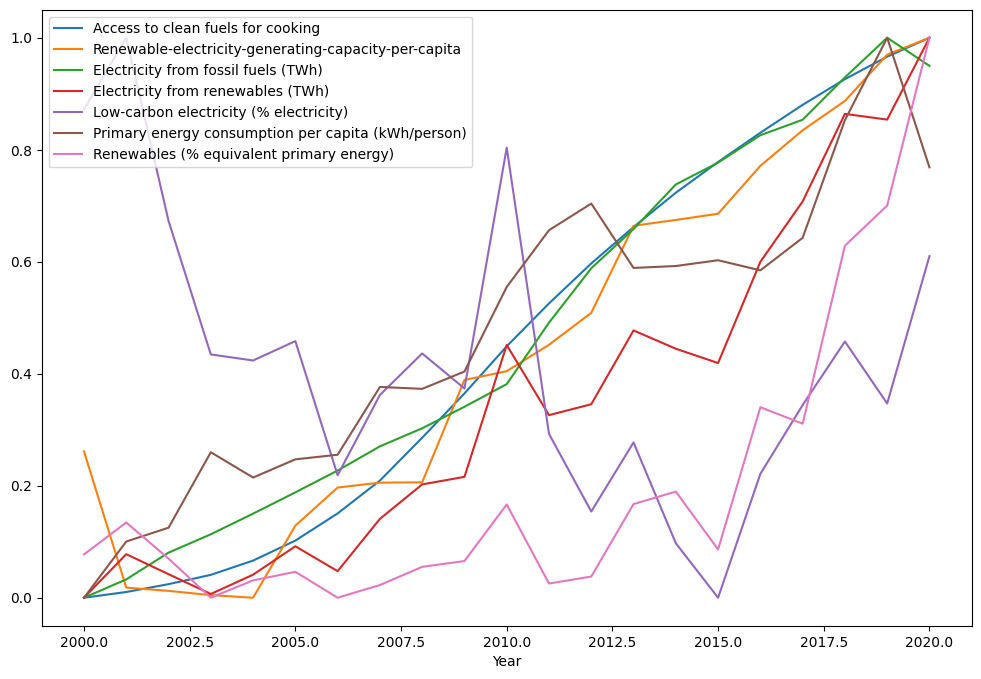

In [5]:
scaled_global_data_df.plot(figsize = (12, 8), fontsize = 10)

## Making a Windowed dataset

In [6]:
# Setup Dataset Hyperparameter
HORIZON = 1
WINDOW_SIZE = 4

In [7]:
# Make a copy
global_data_windowed = global_data_df.copy()

# add windowed columns
for i in range(WINDOW_SIZE):
  global_data_windowed[f"Renewables (% equivalent primary energy)+{i+1}"] = global_data_windowed["Renewables (% equivalent primary energy)"].shift(periods = i + 1)
global_data_windowed.head(10)

,Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Renewables (% equivalent primary energy),Renewables (% equivalent primary energy)+1,Renewables (% equivalent primary energy)+2,Renewables (% equivalent primary energy)+3,Renewables (% equivalent primary energy)+4
Year,,,,,,,,,,,
2000,6.1,25.89,78.43,19.60,19.993880,5435.4355,3.733640,NaN,NaN,NaN,NaN
2001,6.9,21.71,83.96,22.19,20.904380,5740.4346,4.112387,3.733640,NaN,NaN,NaN
2002,8.0,21.61,92.03,21.00,18.579138,5815.3860,3.683814,4.112387,3.733640,NaN,NaN
2003,9.3,21.48,97.57,19.82,16.883892,6224.9414,3.221095,3.683814,4.112387,3.733640,NaN
2004,11.3,21.40,103.80,20.97,16.806925,6087.6787,3.425964,3.221095,3.683814,4.112387,3.733640
2005,14.1,23.61,110.22,22.66,17.052980,6186.4365,3.527426,3.425964,3.221095,3.683814,4.112387
2006,17.9,24.78,116.80,21.18,15.350051,6211.2920,3.220308,3.527426,3.425964,3.221095,3.683814
2007,22.5,24.93,124.10,24.29,16.369028,6579.2300,3.370551,3.220308,3.527426,3.425964,3.221095
2008,28.5,24.94,129.55,26.34,16.896530,6569.1010,3.586532,3.370551,3.220308,3.527426,3.425964


In [8]:
import numpy as np

# Create X (windows) and y (horizons) features
X = global_data_windowed.dropna().drop("Renewables (% equivalent primary energy)", axis = 1).astype(np.float32)
y = global_data_windowed.dropna()["Renewables (% equivalent primary energy)"].astype(np.float32)

In [9]:
X.head()

,Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Renewables (% equivalent primary energy)+1,Renewables (% equivalent primary energy)+2,Renewables (% equivalent primary energy)+3,Renewables (% equivalent primary energy)+4
Year,,,,,,,,,,
2004,11.3,21.400000,103.800003,20.969999,16.806925,6087.678711,3.221095,3.683814,4.112387,3.733640
2005,14.1,23.610001,110.220001,22.660000,17.052980,6186.436523,3.425964,3.221095,3.683814,4.112387
2006,17.9,24.780001,116.800003,21.180000,15.350051,6211.291992,3.527426,3.425964,3.221095,3.683814
2007,22.5,24.930000,124.099998,24.290001,16.369028,6579.229980,3.220309,3.527426,3.425964,3.221095
2008,28.5,24.940001,129.550003,26.340000,16.896530,6569.101074,3.370551,3.220309,3.527426,3.425964


In [10]:
y.head()

Year
2004    3.425964
2005    3.527426
2006    3.220309
2007    3.370551
2008    3.586532
Name: Renewables (% equivalent primary energy), dtype: float32

In [11]:
# make train and test set using indexing
split_size = int(len(X) * 0.75)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

In [12]:
len(X_train), len(X_test), len(y_train), len(y_test)

(12, 5, 12, 5)

## Build the model

In [13]:
import tensorflow as tf
import os
# create a function implement a ModelCheckpoint callback with a specific filename

def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, f"{model_name}.h5"),
                                            verbose = 1,
                                            save_best_only = True)

In [14]:
from tensorflow.keras import layers

# create the model
model = tf.keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(HORIZON)
], name = "model_dense")

# compile the model
model.compile(loss = "mae",
              metrics = ["mae"],
              optimizer = tf.keras.optimizers.Adam())

In [15]:
# fit the model
history = model.fit(X_train, y_train,
                    epochs = 100,
                    batch_size = 8,
                    validation_data = (X_test, y_test),
                    callbacks = [create_model_checkpoint(model.name),
                                 tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",
                                                                      patience = 3,
                                                                      verbose = 1)])

Epoch 1/100
1/2 [==============>...............] - ETA: 1s - loss: 1485.7148 - mae: 1485.7148
Epoch 1: val_loss improved from inf to 1236.93262, saving model to model_experiments/model_dense.h5
2/2 [==============================] - 1s 232ms/step - loss: 1415.3755 - mae: 1415.3755 - val_loss: 1236.9326 - val_mae: 1236.9326 - lr: 0.0010
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 1133.3502 - mae: 1133.3502
Epoch 2: val_loss improved from 1236.93262 to 832.25146, saving model to model_experiments/model_dense.h5
2/2 [==============================] - 0s 50ms/step - loss: 1041.7189 - mae: 1041.7189 - val_loss: 832.2515 - val_mae: 832.2515 - lr: 0.0010
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 743.6515 - mae: 743.6515
Epoch 3: val_loss improved from 832.25146 to 443.35822, saving model to model_experiments/model_dense.h5
2/2 [==============================] - 0s 52ms/step - loss: 683.6055 - mae: 683.6055 - val_loss: 443.3582 - val_mae: 443.358

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 58ms/step - loss: 344.0703 - mae: 344.0703 - val_loss: 62.9829 - val_mae: 62.9829 - lr: 0.0010
Epoch 5/100
1/2 [==============>...............] - ETA: 0s - loss: 66.5566 - mae: 66.5566
Epoch 5: val_loss did not improve from 62.98292
2/2 [==============================] - 0s 35ms/step - loss: 78.2941 - mae: 78.2941 - val_loss: 257.4266 - val_mae: 257.4266 - lr: 0.0010
Epoch 6/100
1/2 [==============>...............] - ETA: 0s - loss: 212.9409 - mae: 212.9409
Epoch 6: val_loss did not improve from 62.98292
2/2 [==============================] - 0s 32ms/step - loss: 239.3290 - mae: 239.3290 - val_loss: 383.7600 - val_mae: 383.7600 - lr: 0.0010
Epoch 7/100
1/2 [==============>...............] - ETA: 0s - loss: 324.7661 - mae: 324.7661
Epoch 7: val_loss did not improve from 62.98292

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
2/2 [==============================] - 0s 59ms/step - loss: 329.3613 - mae: 329.3613 - val_

In [16]:
# evaluate the best model
model = tf.keras.models.load_model("/content/model_experiments/model_dense.h5")
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 117ms/step - loss: 62.9829 - mae: 62.9829


[62.9829216003418, 62.9829216003418]